## **INSERT DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


In [ ]:
merge = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori.csv")
color = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori_color.csv")
texture = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori_texture.csv")

In [ ]:
def feature_selection(x_train, y_train, x_test, fitur):
 fs = SelectKBest(score_func=mutual_info_classif, k=round(fitur/6))
 fs.fit(x_train, y_train)
 x_train_fs = fs.transform(x_train)
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs

## **COLOR & TEXTURE**

### Pre-processing

In [ ]:
merge.head(10)

,Id,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,...,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135,Label
0,0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,...,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07,dry
1,1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,...,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06,dry
2,2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,...,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05,dry
3,3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,...,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06,dry
4,4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,...,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06,dry
5,5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,...,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07,dry
6,6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,...,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04,dry
7,7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,...,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04,dry
8,8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,...,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04,dry
9,9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,...,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04,dry


In [ ]:
x_merge = merge.drop(["Id", "Label"], axis=1)
x_merge.head(10)

,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,Blue_V,...,NIR15_Hom90,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135
0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,6.21,...,0.39,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07
1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,7.13,...,0.35,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06
2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,7.38,...,0.35,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05
3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,7.51,...,0.36,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06
4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,5.69,...,0.36,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06
5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,5.60,...,0.36,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07
6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,4.99,...,0.25,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04
7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,5.42,...,0.25,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04
8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,4.78,...,0.24,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04
9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,4.58,...,0.25,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04


In [ ]:
y_merge = merge["Label"]
y_merge.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_merge, y_merge, test_size = 0.3, random_state = 50)

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)

In [ ]:
import pickle
pickle.dump(nbtrain, open("model.pkl", "wb"))

In [ ]:
x_train.shape, x_test.shape

((405, 300), (174, 300))

In [ ]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'inmature' 'semimature' 'inmature'
 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature' 'semimature'
 'mature' 'overripe' 'semimature' 'semimature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature' 'inmature'
 'inmature' 'inmature' 'mature' 'inmature' 'overripe' 'inmature' 'mature'
 'mature' 'mature' 'dry' 'overripe' 'semimature' 'mature' 'inmature'
 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature' 'semimature'
 'semimature' 'semimature' 'inmature' 'inmature' 'overripe' 'mature'
 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature' 'mature'
 'semimature' 'inmature' 'mature' 'mature' 'semimature' 'overripe'
 'inmature' 'semimature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'semimature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' '

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.9252873563218391
Precision Naive Bayes :  0.9326388888888889
Recall Naive Bayes :  0.9269505494505494
F1-Score Naive Bayes :  0.9294812622879842


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       1.00      0.94      0.97        16
    inmature       0.86      0.89      0.87        35
      mature       0.96      0.96      0.96        52
    overripe       0.97      1.00      0.98        31
  semimature       0.87      0.85      0.86        40

    accuracy                           0.93       174
   macro avg       0.93      0.93      0.93       174
weighted avg       0.93      0.93      0.93       174



### Model dengan seleksi fitur

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Fitur','Score'] 
print(featureScores.nlargest(int(x_train.shape[1]/6),'Score'))
# print(mean)

                Fitur     Score
24             Lime_M  0.910814
33            Amber_V  0.828932
206   RedOrange_Cor90  0.826888
40              Red_M  0.808234
158        Lime_Cor90  0.805866
52            NIR14_M  0.797381
48           FarRed_M  0.788345
28           Yellow_M  0.785065
222         Red_Cor90  0.784847
25             Lime_V  0.773440
41              Red_V  0.772720
190       Amber_Cor90  0.770826
238     DeepRed_Cor90  0.766946
32            Amber_M  0.762175
29           Yellow_V  0.761375
36        RedOrange_M  0.760487
157        Lime_Cor45  0.760440
37        RedOrange_V  0.760192
45          DeepRed_V  0.759287
159       Lime_Cor135  0.729015
44          DeepRed_M  0.717356
207  RedOrange_Cor135  0.709079
173      Yellow_Cor45  0.702195
191      Amber_Cor135  0.699403
175     Yellow_Cor135  0.698348
221         Red_Cor45  0.697226
223        Red_Cor135  0.687565
56            NIR15_M  0.686621
174      Yellow_Cor90  0.684094
231        Red_Con135  0.683884
55      

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 50), (174, 50))

In [ ]:
Y_predict = nbtrain.predict(x_test_fs)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'mature' 'semimature' 'inmature'
 'overripe' 'inmature' 'semimature' 'overripe' 'semimature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'overripe' 'semimature' 'inmature' 'overripe'
 'mature' 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'semimature'
 'mature' 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature'
 'inmature' 'semimature' 'semimature' 'semimature' 'inmature' 'inmature'
 'overripe' 'mature' 'semimature' 'semimature' 'overripe' 'overripe'
 'mature' 'inmature' 'overripe' 'semimature' 'inmature' 'mature' 'mature'
 'mature' 'overripe' 'inmature' 'semimature' 'dry' 'mature' 'overripe'
 'inmature' 'dry' 'semimature' 'mature' 'mature' 'mature' 'inmature'
 'mature' 'inmature' 'mature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' '

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.867816091954023
Precision Naive Bayes :  0.8854975952645209
Recall Naive Bayes :  0.8834340659340659
F1-Score Naive Bayes :  0.8833963004880531


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       1.00      0.94      0.97        16
    inmature       0.89      0.91      0.90        35
      mature       0.85      0.87      0.86        52
    overripe       0.91      1.00      0.95        31
  semimature       0.78      0.70      0.74        40

    accuracy                           0.87       174
   macro avg       0.89      0.88      0.88       174
weighted avg       0.87      0.87      0.87       174



## **COLOR**

### Pre-Processing

In [ ]:
color.head(10)

,Id,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,...,FarRed_K,NIR14_M,NIR14_V,NIR14_S,NIR14_K,NIR15_M,NIR15_V,NIR15_S,NIR15_K,Label
0,0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,...,-1.17,121.09,341.38,-0.07,-1.13,69.81,59.71,-0.54,-0.56,dry
1,1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,...,-1.33,119.24,437.42,0.05,-1.33,69.05,76.09,-0.46,-0.84,dry
2,2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,...,-1.39,117.04,538.51,0.18,-1.41,68.16,100.11,-0.39,-0.86,dry
3,3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,...,-1.08,125.32,495.87,-0.38,-1.07,71.47,91.50,-0.86,-0.05,dry
4,4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,...,-0.89,121.24,347.21,-0.23,-0.93,70.01,59.24,-0.59,-0.62,dry
5,5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,...,-0.81,121.85,312.76,-0.27,-0.79,69.78,63.27,-0.68,-0.42,dry
6,6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,...,-1.61,98.46,1233.97,-0.18,-1.38,56.94,318.92,-0.53,-0.97,dry
7,7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,...,-1.58,100.94,1219.04,-0.31,-1.34,58.11,311.37,-0.65,-0.84,dry
8,8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,...,-1.61,96.08,1189.31,-0.11,-1.39,55.84,311.96,-0.48,-1.02,dry
9,9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,...,-1.58,101.40,1263.53,-0.27,-1.35,58.42,322.05,-0.62,-0.87,dry


In [ ]:
x_color = color.drop(["Id", "Label"], axis=1)
x_color.head(10)

,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,Blue_V,...,FarRed_S,FarRed_K,NIR14_M,NIR14_V,NIR14_S,NIR14_K,NIR15_M,NIR15_V,NIR15_S,NIR15_K
0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,6.21,...,-0.00,-1.17,121.09,341.38,-0.07,-1.13,69.81,59.71,-0.54,-0.56
1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,7.13,...,0.05,-1.33,119.24,437.42,0.05,-1.33,69.05,76.09,-0.46,-0.84
2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,7.38,...,0.13,-1.39,117.04,538.51,0.18,-1.41,68.16,100.11,-0.39,-0.86
3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,7.51,...,-0.33,-1.08,125.32,495.87,-0.38,-1.07,71.47,91.50,-0.86,-0.05
4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,5.69,...,-0.21,-0.89,121.24,347.21,-0.23,-0.93,70.01,59.24,-0.59,-0.62
5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,5.60,...,-0.14,-0.81,121.85,312.76,-0.27,-0.79,69.78,63.27,-0.68,-0.42
6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,4.99,...,-0.08,-1.61,98.46,1233.97,-0.18,-1.38,56.94,318.92,-0.53,-0.97
7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,5.42,...,-0.21,-1.58,100.94,1219.04,-0.31,-1.34,58.11,311.37,-0.65,-0.84
8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,4.78,...,-0.00,-1.61,96.08,1189.31,-0.11,-1.39,55.84,311.96,-0.48,-1.02
9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,4.58,...,-0.20,-1.58,101.40,1263.53,-0.27,-1.35,58.42,322.05,-0.62,-0.87


In [ ]:
y_color = color["Label"]
y_color.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_color, y_color, test_size = 0.3, random_state = 50)

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)

In [ ]:
x_train.shape, x_test.shape

((405, 60), (174, 60))

In [ ]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'mature' 'semimature' 'inmature'
 'overripe' 'inmature' 'semimature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'mature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature'
 'mature' 'semimature' 'inmature' 'mature' 'mature' 'mature' 'overripe'
 'inmature' 'semimature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'inmature' 'mature' 'mature'
 'mature' 'semimature' 'semimature' 'inmature' 'semimature' 'inmat

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.8908045977011494
Precision Naive Bayes :  0.9100008707767329
Recall Naive Bayes :  0.8973670684154553
F1-Score Naive Bayes :  0.9013921954846691


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       1.00      0.94      0.97        16
    inmature       0.89      0.91      0.90        35
      mature       0.84      0.94      0.89        52
    overripe       0.94      0.97      0.95        31
  semimature       0.88      0.72      0.79        40

    accuracy                           0.89       174
   macro avg       0.91      0.90      0.90       174
weighted avg       0.89      0.89      0.89       174



### Model dengan seleksi fitur

Feature 0: 0.224493
Feature 1: 0.386545
Feature 2: 0.411428
Feature 3: 0.422471
Feature 4: 0.305089
Feature 5: 0.450761
Feature 6: 0.305435
Feature 7: 0.367995
Feature 8: 0.399166
Feature 9: 0.498665
Feature 10: 0.276739
Feature 11: 0.355701
Feature 12: 0.412305
Feature 13: 0.544757
Feature 14: 0.388123
Feature 15: 0.429945
Feature 16: 0.419264
Feature 17: 0.439755
Feature 18: 0.424439
Feature 19: 0.399218
Feature 20: 0.649241
Feature 21: 0.649605
Feature 22: 0.464627
Feature 23: 0.474887
Feature 24: 0.909287
Feature 25: 0.774714
Feature 26: 0.566941
Feature 27: 0.383024
Feature 28: 0.794490
Feature 29: 0.759274
Feature 30: 0.464741
Feature 31: 0.487697
Feature 32: 0.765845
Feature 33: 0.829340
Feature 34: 0.380272
Feature 35: 0.531101
Feature 36: 0.762455
Feature 37: 0.760192
Feature 38: 0.503385
Feature 39: 0.602410
Feature 40: 0.811139
Feature 41: 0.773253
Feature 42: 0.381553
Feature 43: 0.583930
Feature 44: 0.717444
Feature 45: 0.759535
Feature 46: 0.152765
Feature 47: 0.412152
Fe

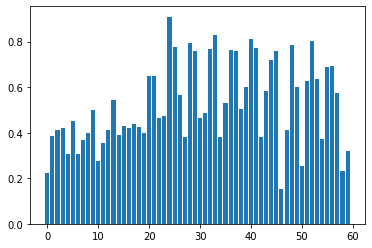

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 10), (174, 10))

In [ ]:
Y_predict = nbtrain.predict(x_test_fs)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'inmature' 'semimature' 'inmature'
 'overripe' 'inmature' 'semimature' 'overripe' 'mature' 'mature' 'mature'
 'mature' 'overripe' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'overripe' 'semimature' 'inmature' 'overripe' 'mature' 'inmature'
 'inmature' 'inmature' 'mature' 'inmature' 'overripe' 'inmature' 'mature'
 'mature' 'mature' 'dry' 'overripe' 'semimature' 'mature' 'inmature'
 'inmature' 'mature' 'semimature' 'dry' 'mature' 'inmature' 'semimature'
 'semimature' 'semimature' 'inmature' 'inmature' 'overripe' 'mature'
 'semimature' 'mature' 'overripe' 'overripe' 'mature' 'inmature'
 'overripe' 'semimature' 'inmature' 'mature' 'mature' 'mature' 'overripe'
 'inmature' 'semimature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'inmature' 'mature' 'mature' 'inmature' 'mature' 'inmature'
 'mature' 'mature' 'semimature' 'inmature' 'mature' 'overripe' 'mature'
 'semimature' 'semimature' 'inmature' 'inmature' 

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.8333333333333334
Precision Naive Bayes :  0.8543226381461675
Recall Naive Bayes :  0.8527197802197802
F1-Score Naive Bayes :  0.8493038216933304


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       1.00      0.94      0.97        16
    inmature       0.78      0.89      0.83        35
      mature       0.82      0.87      0.84        52
    overripe       0.91      1.00      0.95        31
  semimature       0.77      0.57      0.66        40

    accuracy                           0.83       174
   macro avg       0.85      0.85      0.85       174
weighted avg       0.83      0.83      0.83       174



## **TEXTURE**

### Pre-Processing

In [ ]:
texture.head(10)

,Id,Violet_Cor0,Violet_Cor45,Violet_Cor90,Violet_Cor135,Violet_Hom0,Violet_Hom45,Violet_Hom90,Violet_Hom135,Violet_Con0,...,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135,Label
0,0,0.60,0.56,0.58,0.58,0.66,0.64,0.65,0.64,1.13,...,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07,dry
1,1,0.65,0.60,0.61,0.62,0.66,0.64,0.65,0.64,1.11,...,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06,dry
2,2,0.60,0.54,0.54,0.51,0.67,0.65,0.66,0.65,1.32,...,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05,dry
3,3,0.62,0.59,0.59,0.59,0.64,0.63,0.63,0.63,1.33,...,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06,dry
4,4,0.60,0.58,0.57,0.55,0.66,0.65,0.65,0.64,1.07,...,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06,dry
5,5,0.56,0.54,0.55,0.52,0.65,0.65,0.65,0.64,1.13,...,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07,dry
6,6,0.62,0.61,0.62,0.59,0.65,0.64,0.65,0.64,1.17,...,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04,dry
7,7,0.62,0.61,0.61,0.59,0.64,0.64,0.64,0.63,1.21,...,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04,dry
8,8,0.58,0.57,0.57,0.53,0.64,0.64,0.64,0.63,1.18,...,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04,dry
9,9,0.57,0.56,0.57,0.54,0.65,0.64,0.65,0.63,1.17,...,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04,dry


In [ ]:
x_texture = texture.drop(["Id", "Label"], axis=1)
x_texture.head(10)

,Violet_Cor0,Violet_Cor45,Violet_Cor90,Violet_Cor135,Violet_Hom0,Violet_Hom45,Violet_Hom90,Violet_Hom135,Violet_Con0,Violet_Con45,...,NIR15_Hom90,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135
0,0.60,0.56,0.58,0.58,0.66,0.64,0.65,0.64,1.13,1.24,...,0.39,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07
1,0.65,0.60,0.61,0.62,0.66,0.64,0.65,0.64,1.11,1.25,...,0.35,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06
2,0.60,0.54,0.54,0.51,0.67,0.65,0.66,0.65,1.32,1.56,...,0.35,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05
3,0.62,0.59,0.59,0.59,0.64,0.63,0.63,0.63,1.33,1.45,...,0.36,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06
4,0.60,0.58,0.57,0.55,0.66,0.65,0.65,0.64,1.07,1.13,...,0.36,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06
5,0.56,0.54,0.55,0.52,0.65,0.65,0.65,0.64,1.13,1.18,...,0.36,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07
6,0.62,0.61,0.62,0.59,0.65,0.64,0.65,0.64,1.17,1.17,...,0.25,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04
7,0.62,0.61,0.61,0.59,0.64,0.64,0.64,0.63,1.21,1.20,...,0.25,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04
8,0.58,0.57,0.57,0.53,0.64,0.64,0.64,0.63,1.18,1.19,...,0.24,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04
9,0.57,0.56,0.57,0.54,0.65,0.64,0.65,0.63,1.17,1.16,...,0.25,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04


In [ ]:
y_texture = texture["Label"]
y_texture.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_texture, y_texture, test_size = 0.3, random_state = 50)

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)

In [ ]:
x_train.shape, x_test.shape

((405, 240), (174, 240))

In [ ]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'inmature' 'semimature' 'inmature'
 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature' 'semimature'
 'mature' 'overripe' 'semimature' 'semimature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature' 'inmature'
 'inmature' 'inmature' 'mature' 'inmature' 'overripe' 'inmature' 'mature'
 'mature' 'mature' 'dry' 'overripe' 'semimature' 'mature' 'inmature'
 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature' 'semimature'
 'semimature' 'semimature' 'inmature' 'inmature' 'overripe' 'mature'
 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature'
 'overripe' 'semimature' 'inmature' 'mature' 'mature' 'semimature'
 'overripe' 'inmature' 'semimature' 'dry' 'mature' 'overripe' 'inmature'
 'dry' 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'semimature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature'

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.9080459770114943
Precision Naive Bayes :  0.907842105263158
Recall Naive Bayes :  0.9116527827011698
F1-Score Naive Bayes :  0.9092268361506879


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.94      0.94      0.94        16
    inmature       0.82      0.89      0.85        35
      mature       0.98      0.94      0.96        52
    overripe       0.94      0.97      0.95        31
  semimature       0.87      0.82      0.85        40

    accuracy                           0.91       174
   macro avg       0.91      0.91      0.91       174
weighted avg       0.91      0.91      0.91       174



### Model dengan seleksi fitur

Feature 0: 0.273945
Feature 1: 0.278323
Feature 2: 0.310168
Feature 3: 0.281125
Feature 4: 0.109653
Feature 5: 0.183222
Feature 6: 0.143396
Feature 7: 0.140556
Feature 8: 0.219186
Feature 9: 0.285944
Feature 10: 0.223410
Feature 11: 0.289645
Feature 12: 0.156896
Feature 13: 0.192581
Feature 14: 0.198619
Feature 15: 0.153505
Feature 16: 0.171723
Feature 17: 0.144650
Feature 18: 0.207689
Feature 19: 0.182475
Feature 20: 0.191978
Feature 21: 0.254634
Feature 22: 0.187981
Feature 23: 0.187036
Feature 24: 0.247315
Feature 25: 0.310200
Feature 26: 0.317141
Feature 27: 0.291019
Feature 28: 0.342743
Feature 29: 0.348559
Feature 30: 0.332297
Feature 31: 0.273901
Feature 32: 0.146402
Feature 33: 0.074795
Feature 34: 0.225416
Feature 35: 0.210778
Feature 36: 0.348868
Feature 37: 0.384098
Feature 38: 0.368052
Feature 39: 0.330454
Feature 40: 0.486628
Feature 41: 0.450013
Feature 42: 0.444716
Feature 43: 0.462026
Feature 44: 0.399367
Feature 45: 0.354280
Feature 46: 0.312814
Feature 47: 0.317658
Fe

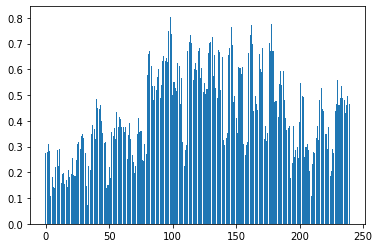

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
# print(fs.score_)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 40), (174, 40))

In [ ]:
Y_predict = nbtrain.predict(x_test_fs)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['mature' 'mature' 'mature' 'overripe' 'mature' 'semimature' 'inmature'
 'overripe' 'inmature' 'semimature' 'overripe' 'semimature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'dry' 'mature' 'overripe' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'semimature'
 'mature' 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature'
 'inmature' 'semimature' 'semimature' 'semimature' 'inmature' 'inmature'
 'overripe' 'mature' 'semimature' 'semimature' 'overripe' 'overripe'
 'mature' 'inmature' 'overripe' 'semimature' 'inmature' 'mature' 'mature'
 'mature' 'overripe' 'inmature' 'semimature' 'dry' 'mature' 'overripe'
 'inmature' 'dry' 'semimature' 'semimature' 'mature' 'mature' 'inmature'
 'mature' 'inmature' 'mature' 'mature' 'semimature' 'inmature' 'mature'
 'dry' 'mature' 'semimature' 'semimature' 'inmature' 'semima

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi Naive Bayes : ",accuracy)
print("Precision Naive Bayes : ",precision)
print("Recall Naive Bayes : ",recall)
print("F1-Score Naive Bayes : ",f1score)

Akurasi Naive Bayes :  0.8735632183908046
Precision Naive Bayes :  0.8720177103099305
Recall Naive Bayes :  0.8840792272243885
F1-Score Naive Bayes :  0.8773802774558263


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.83      0.94      0.88        16
    inmature       0.94      0.91      0.93        35
      mature       0.88      0.87      0.87        52
    overripe       0.90      0.90      0.90        31
  semimature       0.80      0.80      0.80        40

    accuracy                           0.87       174
   macro avg       0.87      0.88      0.88       174
weighted avg       0.87      0.87      0.87       174



## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, Y_predict)
cm_multi = multilabel_confusion_matrix(y_test, Y_predict)
print(cm)
print(cm_multi)

[[22  0  0  2  0]
 [ 0 32  1  0  6]
 [ 0  0 38  1  5]
 [ 0  0  2 35  0]
 [ 0  2  4  0 40]]
[[[166   0]
  [  2  22]]

 [[149   2]
  [  7  32]]

 [[139   7]
  [  6  38]]

 [[150   3]
  [  2  35]]

 [[133  11]
  [  6  40]]]


In [ ]:
result = []
for i in range(len(cm_multi)):
  res = []
  TP = cm_multi[i][0][0]
  FP = cm_multi[i][0][1]
  FN = cm_multi[i][1][0]
  TN = cm_multi[i][1][1]
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1score = ((precision * recall) / (precision + recall)) * 2
  res.append(accuracy)
  res.append(precision)
  res.append(recall)
  res.append(f1score)
  result.append(res)

macro_avg = []
for k in range(4):
  a = result[0][k]
  b = result[1][k]
  c = result[2][k]
  d = result[3][k]
  e = result[4][k]
  mean = (a+b+c+d+e)/5
  macro_avg.append(mean)
print(macro_avg)

[0.9515789473684212, 0.9685626058763642, 0.969104154103175, 0.9687116723231817]


In [ ]:
cm_multi = multilabel_confusion_matrix(y_test, Y_predict)

TP = 0
FP = 0
FN = 0
TN = 0
for i in range(len(cm_multi)):
  TP = TP + cm_multi[i][0][0]
  FP = FP + cm_multi[i][0][1]
  FN = FN + cm_multi[i][1][0]
  TN = TN + cm_multi[i][1][1]

micro_avg = []
accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1score = ((precision * recall) / (precision + recall)) * 2
micro_avg.append(accuracy)
micro_avg.append(precision)
micro_avg.append(recall)
micro_avg.append(f1score)
print(micro_avg)

[0.9515789473684211, 0.9697368421052631, 0.9697368421052631, 0.969736842105263]


In [ ]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

         dry       1.00      0.92      0.96        24
    inmature       0.94      0.82      0.88        39
      mature       0.84      0.86      0.85        44
    overripe       0.92      0.95      0.93        37
  semimature       0.78      0.87      0.82        46

    accuracy                           0.88       190
   macro avg       0.90      0.88      0.89       190
weighted avg       0.88      0.88      0.88       190



In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ["dry", "inmature", "mature", "overripe", "semimature"], 
                     columns = ["dry", "inmature", "mature", "overripe", "semimature"])

print(cm_df)
print(cm)

            dry  inmature  mature  overripe  semimature
dry          22         0       0         2           0
inmature      0        32       1         0           6
mature        0         0      38         1           5
overripe      0         0       2        35           0
semimature    0         2       4         0          40
[[22  0  0  2  0]
 [ 0 32  1  0  6]
 [ 0  0 38  1  5]
 [ 0  0  2 35  0]
 [ 0  2  4  0 40]]


In [ ]:
TPTN = 0
FP = 0
FN = 0
for i in range(len(cm)):
  for j in range(len(cm[i])):
    if j == i:
      TPTN = TPTN + cm[i][j]
    elif j > i:
      FP = FP + cm[i][j]
    elif j < i:
      FN = FN + cm[i][j]
classification_accuracy = TPTN / float(TPTN + FP + FN)
print(classification_accuracy)

0.8789473684210526


In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(classification_accuracy)

1.0


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.0


In [ ]:
precision = TP / float(TP + FP)
print(precision)

1.0


In [ ]:
recall = TP / float(TP + FN)
print(recall)

1.0


In [ ]:
f1score = ((precision * recall) / (precision + recall)) * 2
print(f1score)

1.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nbtrain, x_test, y_test, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         0.89473684 1.         0.78947368 0.89473684 0.94736842
 1.         0.94736842 0.94736842 0.73684211]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9158
